<a href="https://colab.research.google.com/github/otavioaugusto1/deep-learning/blob/main/Deep_learning_Previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iremos prever como ficará a quantidade de passageiros que usarão aviões no futuro.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
dados = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(dados)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


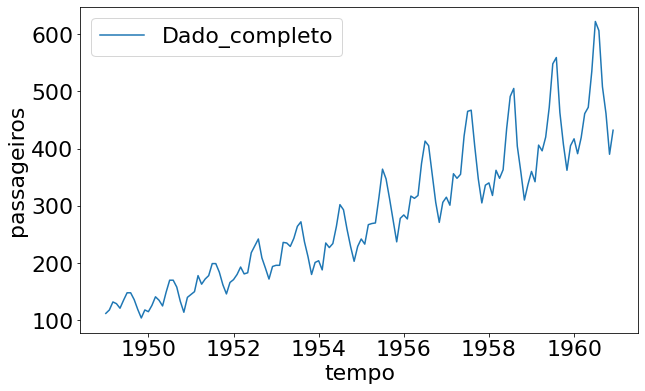

In [2]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='Dado_completo')

Pré-processamento
Tornaremos nossas "datas" e "passageiros" em uma mesma escala para que a rede neural possa entender com mais facilidade

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
dado_escalado = sc.transform(passageiros)
x = dado_escalado[:,0] # X seria a entrada
y = dado_escalado[:,1] # Y seria a saída

Text(0, 0.5, 'Passageiros')

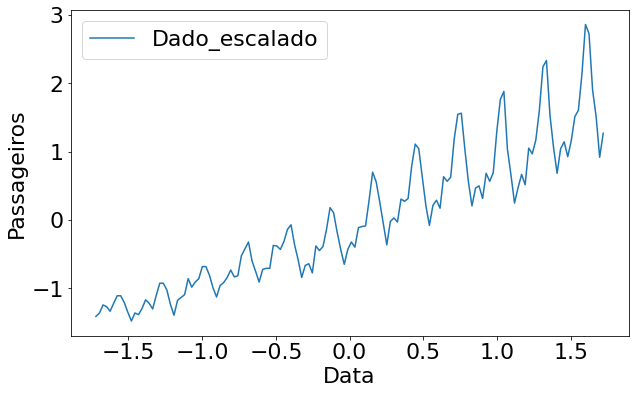

In [5]:
import matplotlib.pyplot as plt
sns.lineplot(x=x,y=y,label="Dado_escalado")
plt.xlabel('Data')
plt.ylabel('Passageiros')

Separação para a rede neural treinar

In [6]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [7]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0, 0.5, 'Passageiros')

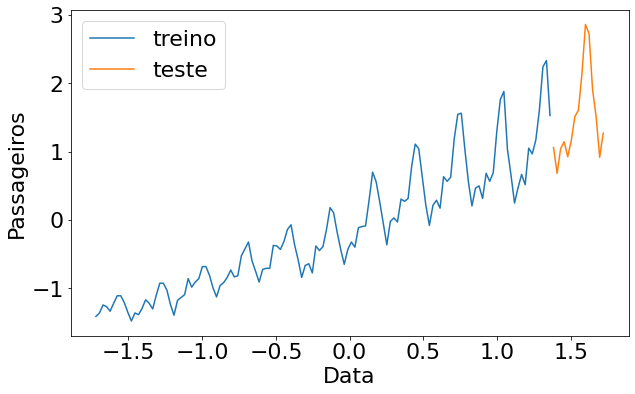

In [8]:
sns.lineplot(x=xtreino,y=ytreino,label="treino")
sns.lineplot(x=xteste,y=yteste,label="teste")
plt.xlabel("Data")
plt.ylabel("Passageiros")

Criação da rede neural

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
regressor = Sequential()

In [10]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',activation='linear',use_bias=False)) # BIAS = VIÉS (pesos para somar nas arestas dos neuronios)

In [11]:
regressor.compile(loss = "mean_squared_error",optimizer="adam")

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


Treinando a rede

In [13]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1286


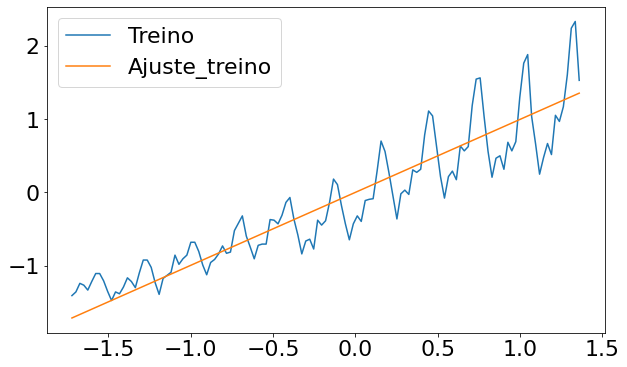

In [14]:
y_predict = regressor.predict(xtreino)
sns.lineplot(x=xtreino,y=ytreino,label="Treino")
sns.lineplot(x=xtreino,y=y_predict[:,0],label="Ajuste_treino")

In [16]:
d ={"tempo":xtreino,"passageiros":y_predict[:,0]}
resultado = pd.DataFrame(data=d)
resultado

,tempo,passageiros
0,-1.720064,-1.712793
1,-1.696007,-1.688838
2,-1.671950,-1.664883
3,-1.647894,-1.640928
4,-1.623837,-1.616973
...,...,...
124,1.262984,1.257645
125,1.287041,1.281601
126,1.311098,1.305556
127,1.335155,1.329511


In [17]:
resultados_transf = sc.inverse_transform(resultado)

In [18]:
resultados_transf = pd.DataFrame(resultados_transf)

In [19]:
resultados_transf.columns = ["tempo","passageiros"]

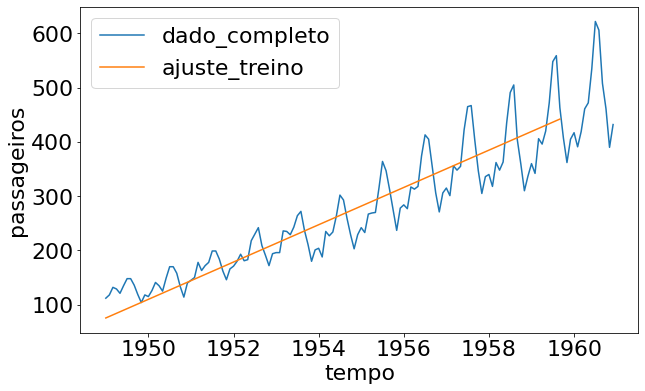

In [20]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')

In [21]:
y_predict_teste = regressor.predict(xteste)

In [22]:
d = {'tempo':xteste,'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [23]:
resultado_trans_teste = sc.inverse_transform(resultados_teste)

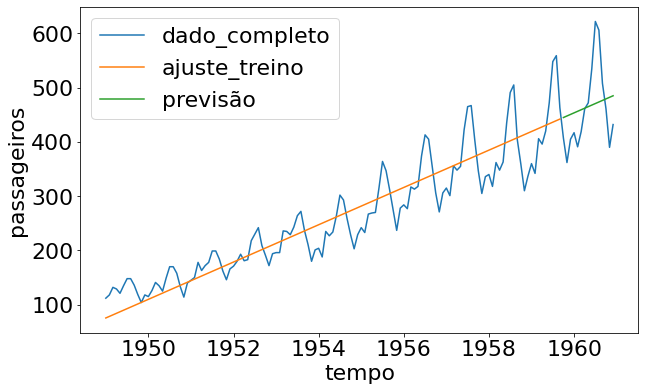

In [24]:
resultado_trans_teste= pd.DataFrame(resultado_trans_teste)
resultado_trans_teste.columns = ['tempo','passageiros']
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trans_teste,label='previsão')


Regressão não-linear

In [25]:
regressor2 = Sequential()

In [26]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [27]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [28]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8023
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7991
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7974
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7961
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7966
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7979
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7987
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7987
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7986
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7985
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7972
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7962
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [29]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [30]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

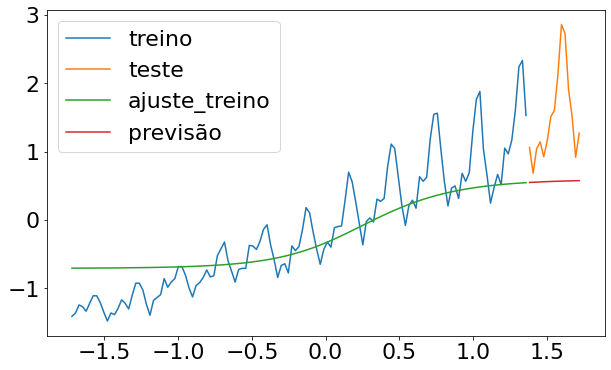

In [31]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

Alterando a forma de como passamos os dados

In [32]:
vetor = pd.DataFrame(ytreino)[0]
import numpy as np


def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [33]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [34]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [35]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [36]:
vetor2 = pd.DataFrame(yteste)[0]

In [37]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

Volta para as redes neurais

In [38]:
regressor3 = Sequential()

In [39]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [40]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7753
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7461
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7222
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6479
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6194
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5895
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5574
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5210
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4825
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4403
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [41]:
y_predict_novo = regressor3.predict(xtreino_novo)

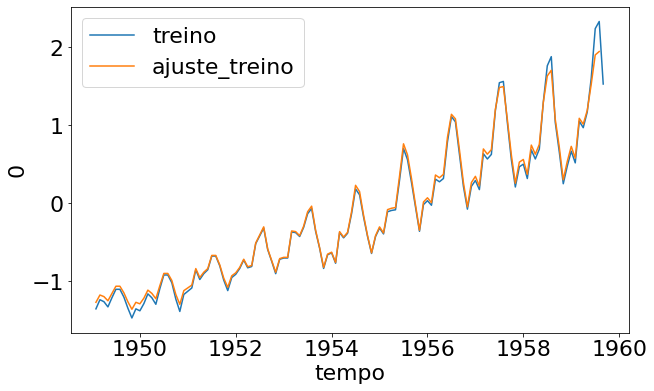

In [42]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [43]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [44]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

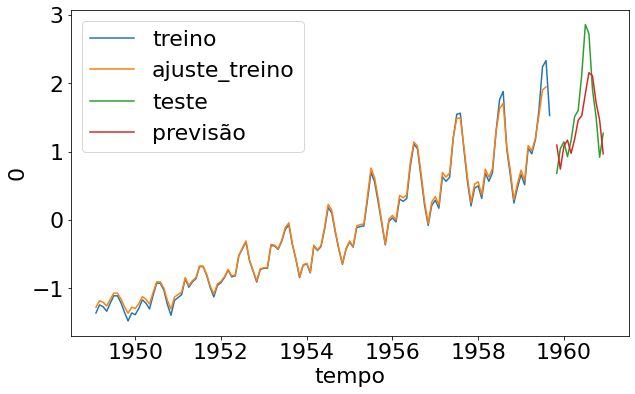

In [45]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

Janelas

In [47]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)


xtreino_novo[0:5] #X


ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [48]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [49]:
regressor4 = Sequential()

In [50]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [51]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7753
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7616
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7573
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7603
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7574
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7507
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7443
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7384
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7331
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7251
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7176
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7056
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [52]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [53]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

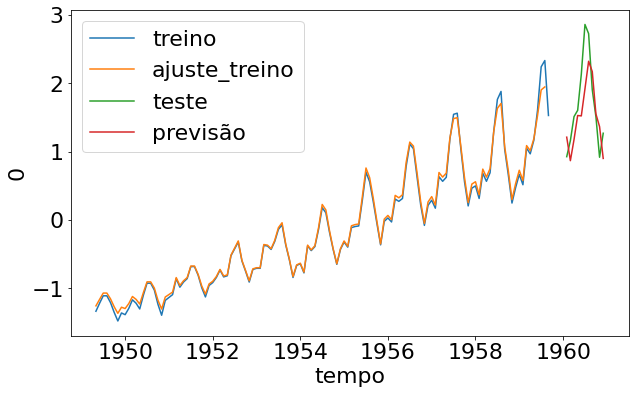

In [54]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')